# Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

## Functions

In [1]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid function
%   g = SIGMOID(z) computes the sigmoid of z.

% You need to return the following variables correctly 
g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the sigmoid of each value of z (z can be a matrix,
%               vector or scalar).

g = 1 ./ (1 + e .^ -z);


% =============================================================

end

In [2]:
function [h, display_array] = displayData(X, example_width)
%DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
    example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
    for i = 1:display_cols
        if curr_ex > m, 
            break; 
        end
        % Copy the patch
        % Get the max value of the patch
        max_val = max(abs(X(curr_ex, :)));
        display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
                      pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
                        reshape(X(curr_ex, :), example_height, example_width) / max_val;
        curr_ex = curr_ex + 1;
    end
    if curr_ex > m, 
        break; 
    end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end

In [3]:
function p = predict(Theta1, Theta2, X)
%PREDICT Predict the label of an input given a trained neural network
%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
%   trained weights of a neural network (Theta1, Theta2)

% Useful values
m = size(X, 1);
num_labels = size(Theta2, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned neural network. You should set p to a 
%               vector containing labels between 1 to num_labels.
%
% Hint: The max function might come in useful. In particular, the max
%       function can also return the index of the max element, for more
%       information see 'help max'. If your examples are in rows, then, you
%       can use max(A, [], 2) to obtain the max for each row.
%



A1 = [ones(1, m); X'];
A2 = [ones(1, m); sigmoid(Theta1*A1)];
A3 = sigmoid(Theta2*A2);
[value, p] = max(A3', [], 2);

% =========================================================================

end

## Initialization

In [4]:
clear ; close all; clc

## Load Data
### The first two columns contains the exam scores and the third column and ontains the label.

Loading and Visualizing Data ...


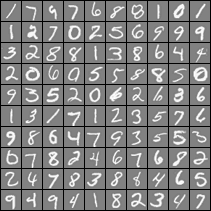

In [5]:

%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('../../data/handwritten_digits.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

## Load Saved Neural Network Parameters
Test case for lrCostFunction


In [6]:
fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('../../data/handwritten_digits_neural_networks.mat');
fprintf('\nLoaded ...\n')


Loading Saved Neural Network Parameters ...

Loaded ...


## Predict Handwritten Digit

In [7]:
pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 97.520000


### Predict Over Loop


Displaying Example Image
ans = -1.3019

Neural Network Prediction: 10 (digit 0)
Paused - press enter to continue, q to exit:

Displaying Example Image
ans = -1.3896

Neural Network Prediction: 4 (digit 4)
Paused - press enter to continue, q to exit:q


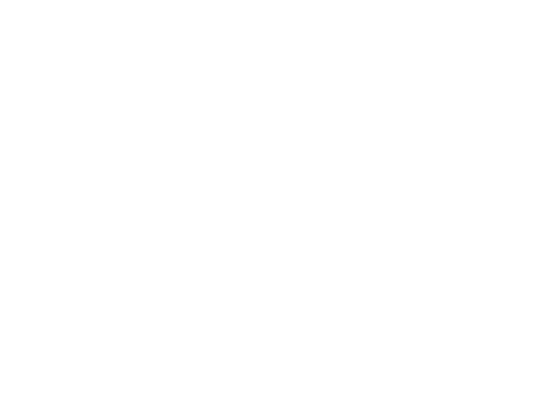

In [10]:
%  To give you an idea of the network's output, you can also run
%  through the examples one at the a time to see what it is predicting.

%  Randomly permute examples
rp = randperm(m);

for i = 1:m
    % Display 
    fprintf('\nDisplaying Example Image\n');
    displayData(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
    s = input('Paused - press enter to continue, q to exit:','s');
    if s == 'q'
      break
    end
end